In [1]:
%matplotlib inline
import numpy as np
# import parameters as p
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from collections.abc import Iterable
import collections
import six
from scipy import interpolate
import pandas as pd
from IPython.display import display, Math
import random as rand
import sys
sys.path.append("..")
from exotop.model_1D import the_results as plottop
from exotop.model_1D import inputs as ins
from exotop.model_1D import parameters as p
from john_scripts.hoggard import read_hoggard
from exotop.useful_and_bespoke import dark_background, imscatter
import matplotlib
# from matplotlib.font_manager import FontProperties
# from matplotlib import rc
# # matplotlib.font_manager._rebuild()
# rc('font',**{'family':'serif','serif':['CMU Serif Roman']}) # latex font for matplotlib
# rc('text', usetex=True)
# np.seterr('raise')

# fig_path = '/space/cmg76/figs/' # office
fig_path = 'figs/' # laptop#
goodfig_path = 'latex/report-firstyr/figs/'
path = '/home/claire/Works/exo-top/benchmarks/'

import pyshtools
import cartopy.crs as ccrs

/home/claire/miniconda3/lib/python3.8/site-packages/pyshtools/shclasses/shcoeffs.py:2383: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Remember to add facecolor=fig.get_facecolor() to savefig()
Remember to add facecolor=fig.get_facecolor() to savefig()


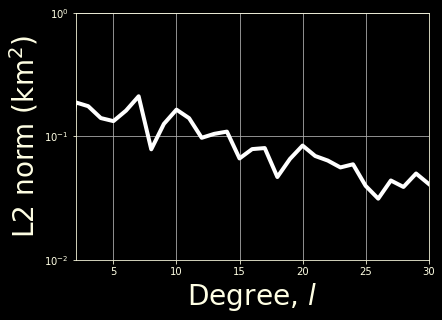

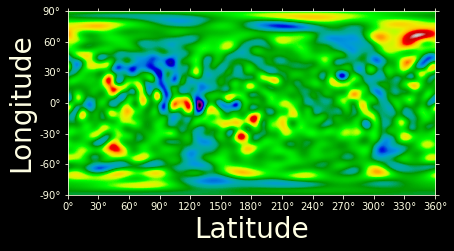

In [8]:
# initialize spherical harmonic coefficients randomly from a given power spectrum

labelsize=28

# fpath = path+'wei_Venus/'
# df = pd.read_csv(fpath+'model_power_m2_b.csv', header=None, names=['l', 'S_l'], index_col=False)
# degrees = df['l']
# power = df['S_l']
# coeffs_global = pyshtools.SHCoeffs.from_random(power, normalization='4pi')
# # print(power)
# # make sure you did it right

lmax_data = 30   # spherical harmonic degree of Hoggard model
lmax_plot = 120  # spherical harmonic degree to use for plotting purposes

cilm, clm = read_hoggard(filename='NGS-2015-07-01303-s13.csv', file_path='/home/claire/Works/hoggard/', to_km=True, lmax=lmax_data)
fig1, ax1 = clm.plot_spectrum(unit="per_l",xscale='lin',yscale='log',convention="l2norm", lw=4, c='w')
plt.xlim([0,30])
plt.ylabel("L2 norm (km$^2$)", fontsize=labelsize)
plt.xlabel("Degree, $l$", fontsize=labelsize)
plt.ylim(np.array([1e-2, 1e0]))
plt.xlim((2,30))

# fig1, ax1 = coeffs_global.plot_spectrum(xscale='lin', yscale='log', show=False, lw=4, c='w')    
# ax1.set_xlabel('Spherical harmonic degree', fontsize=labelsize)
# ax1.set_ylabel('Power', fontsize=labelsize)
ax1.get_legend().remove()
# ax1.set_xlim((2,39))
fig1, ax1 = dark_background(fig1, ax1)
fig1.savefig('spectrum.png', transparent=True, bbox_inches='tight')

# show on spatial grid
# grid = coeffs_global.expand(grid='DH2')
grid = clm.expand(grid='DH2', lmax=lmax_plot)
fig, ax = grid.plot(show=False, cmap='nipy_spectral')

ax.set_xlabel('Latitude', fontsize=labelsize)
ax.set_ylabel('Longitude', fontsize=labelsize)
fig, ax = dark_background(fig, ax)
fig.savefig('map.png', transparent=True, bbox_inches='tight')

# show=False is used to avoid a warning when plotting in inline mode

# When initializing a new class instance, the default is to assume that the input coefficients 
# are 4$\pi$ normalized excluding the Condon-Shortley phase. This normalization convention 
# can be overridden by setting the optional parameter normalization, 
# which takes values of '4pi', 'ortho', 'schmidt', or 'unnorm', 
# along with the parameter csphase, 
# which can be 1 (to exclude the Condon-Shortley phase) or -1 (to include it). 

In [ ]:
def fill_oceans():
    # TODO: think about how to get mean sea level from map given an ocean mass / volume

h_peak =  2.273214083656928
data [[ 1.80628083  1.80628083  1.80628083 ...  1.80628083  1.80628083
   1.80628083]
 [ 1.92082874  1.91386212  1.90656124 ...  1.92743924  1.92082874
   1.92082874]
 [ 2.00202016  1.98763192  1.97193042 ...  2.01503106  2.00202016
   2.00202016]
 ...
 [ 0.07553074  0.07272832  0.06888589 ...  0.07730594  0.07553074
   0.07553074]
 [-0.13040908 -0.13343931 -0.13657459 ... -0.12749507 -0.13040908
  -0.13040908]
 [-0.09862718 -0.09862718 -0.09862718 ... -0.09862718 -0.09862718
  -0.09862718]]


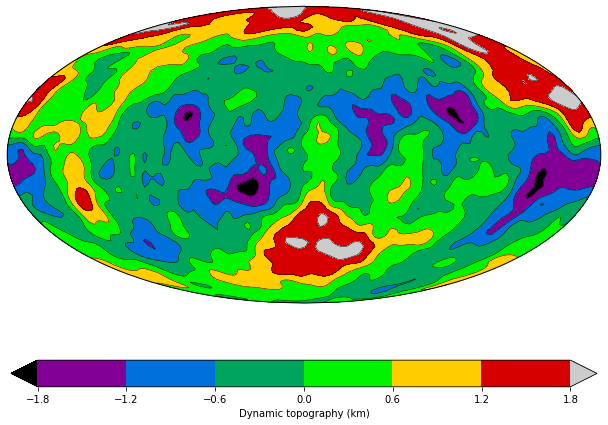

In [6]:
# Expand onto a regular lat/lon grid for plotting
topo = coeffs_global.expand()#lmax=20)
data = topo.data * 1e-3
lats = topo.lats()
lons = topo.lons()

# Aid plotting by repeating the 0 degree longitude as 360 degree longitude
lons = np.hstack([lons,np.array([360.0])])
v = data[:,0]
v=v.reshape((v.shape[0],1))
data = np.hstack([data, v])

print('h_peak = ', np.max(data))

data_crs = ccrs.PlateCarree()
proj_crs = ccrs.Mollweide(central_longitude=22.5)

print('data', data)





fig=plt.figure(figsize=(12,7))
ax = plt.axes(projection=proj_crs)
ax.set_global()
# ax.coastlines()
cf= ax.contourf(lons, lats, data, cmap='nipy_spectral',
                transform=data_crs, extend="both")
ct = ax.contour(lons,lats,data, 
                colors='black', linewidths = 0.5, 
                linestyles = 'solid', transform=data_crs)
cbar = plt.colorbar(cf, orientation = 'horizontal', label='Dynamic topography (km)', fraction = 0.07)

# this is close enough without Ishtar Terra which is not dynamically supported